# Data Mining Project
- Filipe Coelho - id: m20200580
- Ivan Kisialiou - id: m20200998
- Jose Quintas - id: m20200673

## <br/>      

## Phase 0: Data Pre-Processing (neighborhood columns)

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

### Config some libraries

In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 50

## <br/>
## <br/>
## Data Read

In [3]:
df = pd.read_csv('../Data/donors.csv', index_col=0)
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,20

In [4]:
df.shape

(95412, 475)

## <br/>
## <br/>
## Creating neighborhood sub-groups
All sub-groups created were based on the documentation given with the project documentation.

In [5]:
population = [
    'POP901','POP902','POP903','POP90C1','POP90C2','POP90C3',
    'POP90C4','POP90C5'
]

ethnicity = [
    'ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8',
    'ETH9','ETH10','ETH11','ETH12','ETH13','ETH14','ETH15',
    'ETH16','ETHC1','ETHC2','ETHC3','ETHC4','ETHC5','ETHC6'
]

age = [
    'AGE901','AGE902','AGE903','AGE904','AGE905','AGE906',
    'AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3',
    'AGEC4','AGEC5','AGEC6','AGEC7','CHILC1','CHILC2','CHILC3',
    'CHILC4','CHILC5','AC1','AC2'
]

households = [
    'HHN1','HHN2','HHN3','HHN4','HHN5','HHN6','HHP1','HHP2'
]

marriage = [
    'MARR1','MARR2','MARR3','MARR4'
]

structure = [
    'DW1','DW2','DW3','DW4','DW5','DW6','DW7','DW8'
]

home_value = [
    'HV1','HV2','HV3','HV4','HVP1','HVP2','HVP3','HVP4','HVP5',
    'HVP6'
]

housing_units = [
    'HU1','HU2','HU3','HU4','HU5','HUR1','HUR2','RHP1','RHP2',
    'RHP3','RHP4','HUPA1','HUPA2','HUPA3'
]

families = [
    'HHD1','HHD2','HHD3','HHD4','HHD5','HHD6','HHD7','HHD8',
    'HHD9','HHD10','HHD11','HHD12'
]

renters = [
    'HUPA4','HUPA5','HUPA6','HUPA7','RP1','RP2','RP3','RP4'  
]

income = [
    'ADI','IC1','IC2','IC3','IC4','IC5','IC6','IC7','IC8','IC9',
    'IC10','IC11','IC12','IC13','IC14','IC15','IC16','IC17',
    'IC18','IC19','IC20','IC21','IC22','IC23','HHAS1','HHAS2',
    'HHAS3','HHAS4'   
]

mobility = [
    'MC1','MC2','MC3','PEC1','PEC2'
]

transportation = [
    'TPE1','TPE2','TPE3','TPE4','TPE5','TPE6','TPE7','TPE8',
    'TPE9','TPE10','TPE11','TPE12','TPE13'
]

labor_force = [
    'LFC1','LFC2','LFC3','LFC4','LFC5','LFC6','LFC7','LFC8',
    'LFC9','LFC10'
]

occupation = [
    'OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8',
    'OCC9','OCC10','OCC11','OCC12','OCC13'
]

employment = [
    'EIC1','EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8',
    'EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15',
    'EIC16',
]

employer = [
    'OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7'
]

education = [
    'EC1','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1',
    'SEC2','SEC3','SEC4','SEC5'
]

military = [
    'AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2',
    'VC3','VC4'
]

ancestry = [
    'ANC1','ANC2','ANC3','ANC4','ANC5','ANC6','ANC7','ANC8',
    'ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15',
    'POBC1','POBC2'
]

language = [
    'LSC1','LSC2','LSC3','LSC4'
]

vehicles = [
    'VOC1','VOC2','VOC3',
]

home_structures = [
    'HC1','HC2','HC3','HC4','HC5','HC6','HC7','HC8','HC9',
    'HC10','HC11','HC12','HC13','HC14','HC15','HC16','HC17',
    'HC18','HC19','HC20','HC21','MHUC1','MHUC2'
]

In [6]:
hood_subgroups_dic= {
    'population': population,
    'ethnicity': ethnicity,
    'age': age,
    'households': households,
    'marriage': marriage,
    'structure': structure,
    'home_value': home_value,
    'housing_units': housing_units,
    'families': families,
    'renters': renters,
    'income': income,
    'mobility': mobility,
    'transportation': transportation,
    'labor_force': labor_force,
    'occupation': occupation,
    'employment': employment,
    'employer': employer,
    'education': education,
    'military': military,
    'ancestry': ancestry,
    'language': language,
    'vehicles': vehicles,
    'home_structures':home_structures
}

In [7]:
#Array which contains every feature contained in the sub-groups
selected_neighborhood_features = sum(hood_subgroups_dic.values(), [])

In [8]:
df = df[selected_neighborhood_features]

## </br>
## </br>

## Initial analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 0 to 95411
Columns: 280 entries, POP901 to MHUC2
dtypes: float64(1), int64(279)
memory usage: 204.5 MB


In [10]:
df.head()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,AC1,AC2,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,HHP1,HHP2,MARR1,MARR2,MARR3,MARR4,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,HV1,HV2,HV3,HV4,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HU1,HU2,HU3,HU4,HU5,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,ADI,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2
0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,17,50,25,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,10,7,18,33,49,28,12,4,198,276,61,7,12,19,97,95,2,2,0,0,7,7,479,635,3,2,2,7,13,27,47,0,86,14,96,4,7,1,61,58,61,15,4,2,0,0,38,80,70,32,84,16,6,2,5,9,15,3,14,1,0,0,2,5,17,73,177.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,1,13,88,8,0,0,0,0,0,0,4,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2
1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,18,44,5,0,0,0,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,6,5,4,21,75,55,23,9,317,360,69,4,3,24,99,99,0,0,0,0,0,0,5468,5218,12,10,97,98,98,98,99,94,96,4,97,3,9,0,83,76,73,21,5,0,0,0,59,94,88,55,95,5,4,1,3,5,4,2,4,0,0,0,91,91,91,94,13.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,0,2,80,14,0,0,0,0,0,0,6,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4
2,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,17,60,18,0,1,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,6,5,21,35,44,22,6,2,183,254,63,9,9,19,69,69,1,6,5,3,3,3,497,546,2,1,0,1,6,18,50,0,78,22,93,7,18,4,36,49,51,14,5,4,2,24,36,76,65,30,86,14,7,2,5,11,17,3,11,2,3,6,0,2,9,44,281.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,1,21,74,22,0,0,0,0,0,2,2,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3,2,0,7,8,3,3,6,7,1,8,74,3,1,120,22,20,28,16,6,5,3,1,23,1,16,6,0,0,0,10,21,0,28,23,32,8,1,14,1,5,0,0,7,0,0,0,0,0,1,0,0,2,84,96,3,0,0,92,65,29,9,22,3,12,23,50,69,31,0,0,0,6,35,44,0,15,22,77,17,97,92,9,2
3,640,160,219,0,8,92,54,46,61,0,0,11,32,6,2,0,0,0,0,0,31,0,0,1,13,36,13,0,0,0,32,40,44,34,43,47,25,45,35,20,15,25,17,17,12,7,7,20,17,30,14,19,6,6,23,27,50,30,15,8,199,283,63,9,6,23,85,83,3,4,1,0,2,0,1000,1263,2,1,10,25,50,69,92,10,48,52,93,7,6,15,42,55,50,15,5,4,0,9,36,73,61,30,84,16,6,3,3,21,12,4,42,4,0,5,1,8,17,34,67.0,386,388,396,423,15130,27,12,4,26,22,5,0,

In [11]:
df.describe()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,AC1,AC2,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,HHP1,HHP2,MARR1,MARR2,MARR3,MARR4,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,HV1,HV2,HV3,HV4,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HU1,HU2,HU3,HU4,HU5,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,ADI,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

## </br>
## </br>

## Restrict dataframe & remove any NaN present

In [12]:
neighborhood_df = df.copy()

In [13]:
neighborhood_df.iloc

In [14]:
neighborhood_df.dropna(inplace=True)

In [15]:
neighborhood_df.shape


(95280, 280)

## </br>
## </br>


## Scalling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
neighborhood_df = pd.DataFrame(
    scaler.fit_transform(neighborhood_df),
    columns = selected_neighborhood_features,
    index=  neighborhood_df.index
)

neighborhood_df

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,AC1,AC2,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,HHP1,HHP2,MARR1,MARR2,MARR3,MARR4,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,HV1,HV2,HV3,HV4,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HU1,HU2,HU3,HU4,HU5,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,ADI,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2
0,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.000000,0.000000,0.000000,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.101010,0.070707,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.304615,0.394286,0.616162,0.070707,0.164384,0.191919,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.079833,0.105833,0.230769,0.153846,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.868687,0.141414,0.969697,0.040404,0.070707,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.271889,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.000000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.010101,0.131313,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.040404,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.000000,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.101010,0.020202,0.010101,0.070707,0.787879,0.020202,0.000000,0.705882,0.161616,0.101010,0.393939,0.212121,0.216216,0.040404,0.030303,0.051546,0.202020,0.100000,0.263889,0.040404,0.000000,0.000000,0.000000,0.181818,0.393939,0.000000,0.343434,0.232323,0.181818,0.161616,0.012048,0.040404,0.000000,0.250000,0.000000,0.000000,0.050505,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.074074,0.0,0.030303,0.747475,0.888889,0.080808,0.000000,0.040404,0.969697,0.777778,0.191919,0.419355,0.596154,0.050505,0.141414,0.141414,0.313131,0.545455,0.464646,0.000000,0.000000,0.909091,0.000000,0.101010,0.000000,0.0,0.000000,0.333333,0.656566,0.404040,1.000000,1.000000,0.285714,0.4
1,0.036585,0.039552,0.028190,1.000000,0.000000,0.000000,0.505051,0.505051

## </br>
## </br>

## PCA Analysis
Using PCA to reduce dimensionality of data

In [18]:
from sklearn.decomposition import PCA as PCA

In [19]:
# Auxiliary function

def plot_pca_analysis(pca, title='PCA Analysis', figsize=(20,10)):
    
    # figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    #Overall title
    fig.suptitle(title)

    # Axis 1
    ax1.set_title("EigenValue", fontsize=14)
    ax1.plot(pca.explained_variance_, marker=".", markersize=12)

    # Axis 2
    ax2.set_title("Variance Explained", fontsize=14)
    ax2.set_ylabel("Proportion")
    ax2.set_xlabel("Components")
    ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
    ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")
    ax2.legend()
    ax2.set_xticks(range(0, pca.n_components_, 2))
    ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

    plt.show()

## </br>

### Plotting optimal reduction for every sub-group

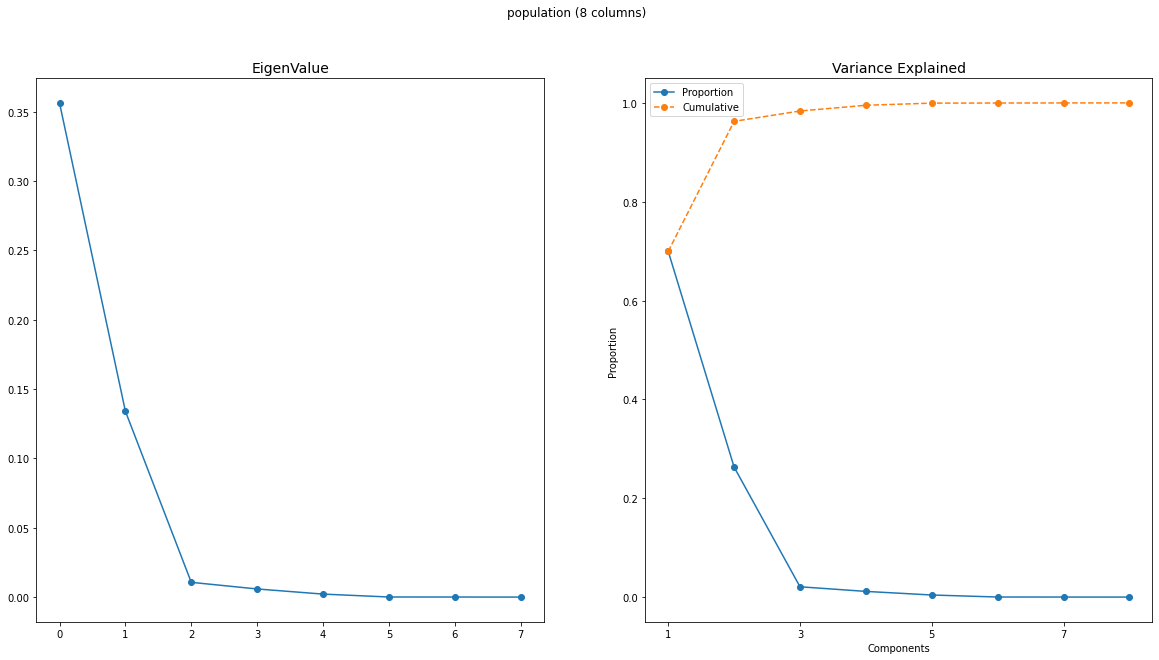

LinAlgError: SVD did not converge

In [20]:
for subGroup in hood_subgroups_dic.keys():
    columns = hood_subgroups_dic[subGroup]

    pca = PCA()
    pca.fit(neighborhood_df[columns])

    plot_title = "%s (%d columns)" % (subGroup, len(columns))
    plot_pca_analysis(pca, plot_title)

    del columns
    del pca
    del plot_title

#### Defining number of variables to keep after PCA

In [21]:
hood_subgroups_pca_dic = {
    "population": 3,
    "ethnicity": 4,
    "age": 4,
    "households": 3,
    "marriage": 3,
    "structure": 3,
    "home_value": 2,
    "housing_units": 4,
    "families": 2,
    "renters": 2,
    "income": 4,
    "mobility": 3,
    "transportation": 3,
    "labor_force": 5,
    "occupation": 8,
    "employment": 5,
    "employer": 3,
    "education": 5,
    "military": 5,
    "ancestry": 4,
    "language": 2,
    "vehicles": 2,
    "home_structures": 4
}

## </br>
## </br>

## Generating PCA dataframe
Dataframe will only contain PCA generated from neighborhood features

In [22]:
pca_df = pd.DataFrame(index = neighborhood_df.index)

In [23]:
#Style to detect relations between original features and PCA features
from IPython.display import display as display

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

In [24]:
for subGroup in hood_subgroups_pca_dic.keys():
    columns = hood_subgroups_dic[subGroup]
    k = hood_subgroups_pca_dic[subGroup]

    #PCA fit
    pca = PCA(n_components=k)
    pca_feat = pca.fit_transform(neighborhood_df[columns])

    #Creating dataframe
    pca_feat_names = [("%s_PC%d"%(subGroup,i)) for i in range(k)]
    pca_df[pca_feat_names] = pd.DataFrame(pca_feat, index=pca_df.index, columns=pca_feat_names)
    
    #Add to neighborhood dataframe to compare correlations
    neighborhood_df[pca_feat_names] = pd.DataFrame(pca_feat, index=pca_df.index, columns=pca_feat_names)

    #Correlation analysis
    correlations = neighborhood_df[columns + pca_feat_names].corr().loc[columns, pca_feat_names]
    display(correlations.style.applymap(_color_red_or_green))

,population_PC0,population_PC1,population_PC2
POP901,0.006781,0.010219,0.993105
POP902,0.025557,0.005121,0.992407
POP903,-0.005031,0.013843,0.989645
POP90C1,-0.984982,-0.162061,0.008173
POP90C2,0.400719,0.911452,0.011388
POP90C3,0.847811,-0.525488,0.009364
POP90C4,0.066268,-0.142605,0.109434
POP90C5,-0.126529,0.076489,0.073907


,ethnicity_PC0,ethnicity_PC1,ethnicity_PC2,ethnicity_PC3
ETH1,-0.968627,-0.109998,0.045840,-0.195957
ETH2,0.885536,-0.346230,-0.117508,-0.261365
ETH3,0.057713,0.055964,0.022613,0.166292
ETH4,0.213427,0.259052,0.011919,0.765153
ETH5,0.244604,0.929188,0.007300,-0.221328
ETH6,0.050455,0.096523,-0.081751,0.265059
ETH7,0.121283,0.114743,0.039409,0.556261
ETH8,0.134279,0.154674,0.036869,0.539163
ETH9,0.188090,0.232364,0.010807,0.528351
ETH10,0.095754,0.130395,-0.014234,0.390535


,age_PC0,age_PC1,age_PC2,age_PC3
AGE901,0.957037,0.046611,-0.049933,-0.070799
AGE902,0.968274,-0.153183,-0.113392,-0.065743
AGE903,0.965223,-0.108015,-0.125407,0.094214
AGE904,0.973495,0.111399,-0.109222,0.040288
AGE905,0.951934,-0.154910,-0.226391,0.011910
AGE906,0.929711,-0.140508,-0.230970,0.171153
AGE907,-0.490639,-0.722939,-0.325712,0.015197
CHIL1,-0.100391,0.407779,-0.860302,0.132747
CHIL2,0.146923,-0.796433,-0.209277,-0.004654
CHIL3,0.366620,-0.409582,0.370246,0.574431


,households_PC0,households_PC1,households_PC2
HHN1,-0.811460,-0.495902,-0.296542
HHN2,-0.410402,0.786314,-0.460496
HHN3,0.986152,-0.035805,-0.035952
HHN4,0.982429,-0.121975,-0.057675
HHN5,0.849900,-0.292359,-0.151248
HHN6,0.650387,-0.361608,-0.199418
HHP1,0.966498,0.023675,-0.183037
HHP2,0.948085,-0.000131,-0.313023


,marriage_PC0,marriage_PC1,marriage_PC2
MARR1,-0.976831,-0.140453,-0.151256
MARR2,0.605609,0.085602,0.058149
MARR3,0.227022,0.862185,-0.452727
MARR4,0.785987,-0.521753,-0.331537


,structure_PC0,structure_PC1,structure_PC2
DW1,-0.922719,-0.347694,0.025324
DW2,-0.921512,-0.359945,0.003263
DW3,0.209600,0.104243,0.924524
DW4,0.945905,-0.271527,0.176363
DW5,0.946766,-0.310589,-0.032747
DW6,0.917327,-0.339503,-0.179148
DW7,0.153651,0.013481,0.101984
DW8,0.104329,-0.005740,0.079422


,home_value_PC0,home_value_PC1
HV1,0.899555,0.319113
HV2,0.917617,0.302001
HV3,0.825400,-0.010533
HV4,0.824220,-0.040634
HVP1,0.846937,0.492080
HVP2,0.924797,0.320258
HVP3,0.963889,-0.035445
HVP4,0.920759,-0.348813
HVP5,0.754283,-0.560690
HVP6,0.687050,0.556453


,housing_units_PC0,housing_units_PC1,housing_units_PC2,housing_units_PC3
HU1,-0.949359,0.167470,-0.061755,-0.118348
HU2,0.914591,-0.232888,0.178310,0.079526
HU3,-0.243218,-0.692922,-0.003270,-0.139110
HU4,0.169285,0.746882,0.244255,0.087459
HU5,-0.086419,0.878625,0.417761,0.069835
HUR1,0.677183,0.043107,0.113455,-0.230506
HUR2,-0.859215,-0.353211,0.292291,0.035204
RHP1,-0.800643,-0.338868,0.360165,0.034750
RHP2,-0.852258,-0.313694,0.298754,0.042926
RHP3,-0.494067,-0.236006,0.025908,0.042849


,families_PC0,families_PC1
HHD1,-0.815762,0.556842
HHD2,-0.971098,-0.016491
HHD3,-0.921059,-0.339723
HHD4,-0.885796,0.235861
HHD5,-0.907032,-0.034976
HHD6,0.853074,0.063803
HHD7,-0.007587,0.833886
HHD8,-0.139901,0.594621
HHD9,0.025242,0.802776
HHD10,0.715972,0.236709


,renters_PC0,renters_PC1
HUPA4,-0.195365,-0.102739
HUPA5,-0.054493,0.343921
HUPA6,0.232312,0.538699
HUPA7,-0.387527,-0.076863
RP1,0.905986,-0.376675
RP2,0.978933,-0.131526
RP3,0.953102,0.240043
RP4,0.818997,0.469697


,income_PC0,income_PC1,income_PC2,income_PC3
ADI,-0.420963,0.899893,-0.028219,0.106717
IC1,0.920037,0.096854,0.116269,0.200818
IC2,0.913328,0.099899,0.217474,0.178111
IC3,0.936561,0.102512,0.164938,0.197967
IC4,0.923934,0.108649,0.242704,0.163690
IC5,0.765907,0.111067,0.397277,0.117825
IC6,-0.847715,-0.116652,0.385598,0.134711
IC7,-0.669089,0.001765,0.049698,-0.311375
IC8,-0.306226,0.055594,-0.289125,-0.436389
IC9,0.295400,0.068175,-0.567805,-0.389819


,mobility_PC0,mobility_PC1,mobility_PC2
MC1,0.948742,0.156430,0.007762
MC2,-0.946036,-0.105926,0.202394
MC3,0.743442,0.029697,0.617404
PEC1,-0.028725,-0.100989,0.447414
PEC2,-0.183074,0.982900,0.013936


,transportation_PC0,transportation_PC1,transportation_PC2
TPE1,-0.387081,-0.903719,0.119515
TPE2,-0.058900,0.458236,0.129155
TPE3,-0.108068,0.633256,-0.029576
TPE4,-0.095024,0.604525,-0.104420
TPE5,-0.093956,0.300849,0.141027
TPE6,0.051358,0.152944,0.003774
TPE7,0.016592,0.062779,-0.019572
TPE8,0.400199,0.381232,-0.169850
TPE9,0.122751,0.113367,-0.044843
TPE10,-0.738778,0.290831,0.392402


,labor_force_PC0,labor_force_PC1,labor_force_PC2,labor_force_PC3,labor_force_PC4
LFC1,-0.382672,-0.689567,0.529209,-0.291613,0.036742
LFC2,-0.363154,-0.618323,0.520221,-0.360157,-0.210496
LFC3,-0.357270,-0.696267,0.467983,-0.177397,0.295398
LFC4,-0.344761,-0.639359,0.515126,-0.317970,-0.260584
LFC5,-0.341386,-0.712806,0.472527,-0.135071,0.281187
LFC6,-0.266739,-0.654274,0.156393,0.567272,0.262052
LFC7,-0.139407,-0.521503,0.375926,0.688580,-0.222022
LFC8,-0.328175,-0.717139,-0.611453,-0.053874,-0.017485
LFC9,-0.961404,0.274390,-0.006230,0.019116,-0.001763
LFC10,0.130511,0.443228,0.057335,-0.266178,0.433246


,occupation_PC0,occupation_PC1,occupation_PC2,occupation_PC3,occupation_PC4,occupation_PC5,occupation_PC6,occupation_PC7
OCC1,0.850309,-0.333589,0.007766,-0.358813,-0.076088,0.124991,0.056050,-0.057933
OCC2,0.820007,0.136322,-0.105523,0.305883,-0.049238,-0.200248,-0.380036,-0.064705
OCC3,0.207484,0.115134,0.001723,-0.145997,-0.035174,0.032891,-0.057743,0.110002
OCC4,0.514364,0.265135,0.062283,0.527632,-0.132954,0.259247,0.521897,-0.090253
OCC5,0.028411,0.817225,0.123749,-0.463084,0.188018,-0.140582,0.074328,-0.161060
OCC6,-0.055673,-0.081599,0.111429,0.015678,-0.009176,-0.039371,-0.013810,0.049941
OCC7,-0.088911,0.150838,0.118163,-0.078160,0.040278,0.056983,-0.029169,0.821808
OCC8,-0.512234,-0.158261,0.776697,0.058221,-0.203896,0.034121,-0.164172,-0.138623
OCC9,-0.333131,-0.435193,-0.072511,0.159160,0.760628,-0.081638,0.069028,-0.166712
OCC10,-0.639368,0.130087,-0.382941,-0.042833,-0.101991,0.549753,-0.279465,-0.129497


,employment_PC0,employment_PC1,employment_PC2,employment_PC3,employment_PC4
EIC1,-0.009737,-0.198004,0.882761,-0.099223,-0.371150
EIC2,-0.124244,-0.046045,0.156503,0.017258,0.173631
EIC3,0.003561,0.178734,0.290889,-0.271884,0.511302
EIC4,0.993664,-0.006054,-0.071965,0.044299,-0.023511
EIC5,-0.013419,0.039803,0.019158,-0.187167,0.160843
EIC6,-0.108661,-0.019277,-0.058646,-0.107155,0.257258
EIC7,-0.017062,-0.023940,-0.159875,-0.233640,-0.080074
EIC8,-0.154003,0.926768,0.001115,0.267352,-0.165209
EIC9,-0.345178,-0.139126,-0.531699,-0.336336,-0.278131
EIC10,-0.116019,0.058140,-0.192275,-0.245936,0.082396


,employer_PC0,employer_PC1,employer_PC2
OEDC1,0.305155,-0.079530,-0.296028
OEDC2,0.444802,-0.413915,0.750537
OEDC3,0.291411,-0.280987,-0.218642
OEDC4,0.372060,0.881035,0.187073
OEDC5,-0.996373,0.016415,0.040883
OEDC6,0.254249,-0.182801,-0.417041
OEDC7,0.140147,0.228939,0.042942


,education_PC0,education_PC1,education_PC2,education_PC3,education_PC4
EC1,0.820877,0.189130,0.069512,-0.320224,-0.306058
EC2,-0.656020,-0.031672,0.534248,0.187645,-0.288130
EC3,-0.749307,-0.004546,0.203657,0.040924,-0.167939
EC4,-0.689289,0.182774,-0.466750,-0.471052,-0.164285
EC5,0.463109,0.267771,-0.397582,0.010791,0.506175
EC6,0.368078,0.443684,-0.511486,0.538581,-0.334784
EC7,0.925951,-0.051681,0.126188,-0.119974,-0.038325
EC8,0.808779,-0.137159,0.269746,-0.156232,-0.096746
SEC1,0.419973,-0.052289,0.056583,-0.064625,-0.097979
SEC2,-0.022349,0.864207,0.305414,0.016687,0.143922


,military_PC0,military_PC1,military_PC2,military_PC3,military_PC4
AFC1,-0.195115,0.142374,0.364925,-0.117503,0.447741
AFC2,-0.206841,0.124332,0.382942,-0.118804,0.458184
AFC3,-0.149594,0.121465,0.279760,-0.092320,0.345392
AFC4,0.293749,-0.610809,0.676783,-0.032723,-0.182270
AFC5,0.388961,-0.625092,0.628708,-0.026704,-0.232901
AFC6,-0.018997,-0.056692,0.487659,-0.138898,0.281153
VC1,-0.757480,-0.565990,-0.120578,-0.226370,0.186696
VC2,0.151517,-0.245277,0.117728,0.887236,0.326051
VC3,0.950816,-0.096483,-0.079867,-0.211024,0.180391
VC4,-0.410330,0.580265,0.590056,-0.213131,0.212745


,ancestry_PC0,ancestry_PC1,ancestry_PC2,ancestry_PC3
ANC1,-0.063995,-0.039165,-0.002351,0.016990
ANC2,0.063314,-0.238622,-0.366958,-0.191090
ANC3,-0.020255,-0.082508,-0.105011,0.303065
ANC4,-0.284361,-0.696266,0.652521,-0.055892
ANC5,0.091655,0.068952,0.059097,0.170380
ANC6,0.172346,0.013323,0.075166,0.324780
ANC7,-0.092669,-0.146811,-0.315087,-0.043939
ANC8,0.279724,0.048125,0.058394,0.671807
ANC9,-0.047349,-0.177532,0.148157,0.182826
ANC10,-0.029097,0.064787,0.154835,0.402254


,language_PC0,language_PC1
LSC1,-0.975675,-0.206785
LSC2,0.876230,-0.471684
LSC3,0.354424,0.498456
LSC4,0.206238,0.492956


,vehicles_PC0,vehicles_PC1
VOC1,-0.782509,-0.604408
VOC2,-0.985090,0.081320
VOC3,-0.836330,0.415503


,home_structures_PC0,home_structures_PC1,home_structures_PC2,home_structures_PC3
HC1,-0.355171,0.330929,0.135794,0.065599
HC2,-0.836362,0.337412,-0.086610,-0.145862
HC3,0.363153,-0.206893,0.128610,-0.349414
HC4,0.598253,-0.317047,0.152613,-0.479217
HC5,0.723678,-0.349533,0.123241,-0.422887
HC6,0.868142,-0.362563,0.152963,-0.092561
HC7,0.841278,-0.405481,0.173271,0.159393
HC8,-0.853610,0.355705,-0.146651,-0.303664
HC9,0.127997,-0.328758,-0.081091,-0.030799
HC10,0.101649,-0.300166,-0.173505,0.013842


## </br>

### Final Dataframe

In [25]:
pca_df.head()

,population_PC0,population_PC1,population_PC2,ethnicity_PC0,ethnicity_PC1,ethnicity_PC2,ethnicity_PC3,age_PC0,age_PC1,age_PC2,age_PC3,households_PC0,households_PC1,households_PC2,marriage_PC0,marriage_PC1,marriage_PC2,structure_PC0,structure_PC1,structure_PC2,home_value_PC0,home_value_PC1,housing_units_PC0,housing_units_PC1,housing_units_PC2,housing_units_PC3,families_PC0,families_PC1,renters_PC0,renters_PC1,income_PC0,income_PC1,income_PC2,income_PC3,mobility_PC0,mobility_PC1,mobility_PC2,transportation_PC0,transportation_PC1,transportation_PC2,labor_force_PC0,labor_force_PC1,labor_force_PC2,labor_force_PC3,labor_force_PC4,occupation_PC0,occupation_PC1,occupation_PC2,occupation_PC3,occupation_PC4,occupation_PC5,occupation_PC6,occupation_PC7,employment_PC0,employment_PC1,employment_PC2,employment_PC3,employment_PC4,employer_PC0,employer_PC1,employer_PC2,education_PC0,education_PC1,education_PC2,education_PC3,education_PC4,military_PC0,military_PC1,military_PC2,military_PC3,military_PC4,ancestry_PC0,ancestry_PC1,ancestry_PC2,ancestry_PC3,language_PC0,language_PC1,vehicles_PC0,vehicles_PC1,home_structures_PC0,home_structures_PC1,home_structures_PC2,home_structures_PC3
0,0.739090,0.067780,-0.042801,-0.098430,0.070711,0.084923,-0.041335,0.190415,-0.102805,0.084175,0.022192,0.085844,0.016610,0.009649,-0.043974,0.063023,-0.029068,-0.471655,-0.106373,0.008961,-0.496019,0.120256,-0.317564,-0.107485,-0.007790,-0.014855,-0.143764,-0.050156,-0.610349,0.002270,0.009078,0.021650,-0.103555,-0.224938,-0.060239,-0.060226,-0.071155,0.149127,-0.181487,-0.012701,0.572382,-0.303254,-0.310889,0.050748,-0.072021,-0.128219,-0.050630,-0.068816,0.007501,-0.062654,-0.007070,0.067899,0.033131,0.250827,-0.019132,-0.023944,-0.010641,-0.034678,-0.089800,0.012687,-0.003350,-0.134865,0.037002,-0.066845,0.006641,-0.033068,-0.128985,-0.033349,0.090281,0.077885,-0.061454,-0.190014,-0.078798,0.093601,-0.001381,0.008727,-0.020738,-0.149220,-0.010897,-0.124509,0.619359,0.573870,-0.017805
1,-0.502875,-0.041549,0.001666,0.113472,0.089578,-0.067811,0.364609,-0.093386,-0.200179,0.053230,-0.033480,0.565832,-0.060372,0.005997,-0.107292,-0.081515,-0.016713,-0.512490,-0.131650,-0.022190,1.828554,0.790791,-0.618775,-0.185531,0.134737,-0.031553,-0.555296,0.019018,0.822267,-0.303375,0.977002,-0.066460,0.380770,0.444299,0.109863,-0.146346,-0.069532,-0.158257,0.002754,0.084327,-0.448368,-0.163269,-0.108800,-0.021691,-0.120337,0.189683,0.001163,0.003369,0.062313,-0.015090,-0.011873,0.013615,-0.000615,-0.049686,0.002152,-0.054424,-0.022647,-0.046633,0.010544,0.088572,0.006394,0.316519,0.073015,0.141731,-0.032156,-0.031529,-0.327625,-0.065007,-0.227824,-0.031626,-0.024657,0.265470,0.271678,0.170480,-0.005973,0.351867,0.288845,-0.423204,0.167903,0.350847,-0.898952,0.644572,-0.244653
2,0.860594,-0.388017,0.074251,-0.165348,-0.050983,-0.020042,-0.010343,0.039390,-0.023644,0.066496,0.041082,-0.019726,0.038318,0.019333,-0.061675,0.028255,-0.009743,-0.160843,0.128216,-0.026368,-0.627522,0.116294,-0.059602,0.140991,-0.170830,-0.039680,-0.094642,-0.038751,-0.778941,-0.149347,-0.262959,0.081040,-0.033907,0.018411,-0.162097,0.002552,0.006333,-0.004821,0.026686,0.008837,-0.396084,-0.040196,-0.031410,0.167575,0.014300,-0.150574,-0.057832,-0.091563,-0.035374,-0.042536,-0.027875,0.011507,-0.014943,0.174955,-0.034673,0.043551,0.003882,0.025313,-0.043657,0.002217,0.043184,-0.156273,-0.027195,0.070835,0.066461,-0.046971,-0.010131,0.059738,-0.104325,0.071957,0.025445,-0.268189,0.057338,-0.081666,-0.037823,-0.087985,-0.030935,-0.074077,0.054052,0.661761,0.957987,0.033777,-0.087828
3,0.839277,-0.307164,-0.047493,0.226661,0.408289,0.052619,0.098131,-0.064637,0.061481,-0.034796,0.051068,0.103880,-0.074419,0.001131,-0.046702,-0.027388,-0.008727,-0.343605,0.008004,0.007191,0.148692,-0.169263,0.217728,-0.116365,-0.032946,0.074870,-0.042555,-0.007686,-0.739529,-0.214551,-0.034374,-0.248392,-0.020667,0.227068,-0.066313,-0.020024,-0.073442,0.252843,0.139047,-0.058615,-0.143426,0.724970,0.444435,-0.238634,-0

## </br>
## </br>
## </br>

## SAVE INTO CSV

In [26]:
pca_df.to_csv('../Exports/CSV/neighborhood_PCAs.csv')